# Project 1: Image registration

**Contents:** <br>

- [Goal](#goal)<br>
- [Deliverables](#deliverables)<br>
- [Assessment](#assessment)<br>

1. [Getting started](#getting_started)<br>
   
    1.1 [Dataset](#dataset)<br>
    
    1.2 [Selecting corresponding point pairs](#selecting_point_pairs)<br>
    
    
2. [Point-based registration](#point-based_reg)<br>
    
    2.1 [Point-based affine image registration](#affine)<br>
    
    2.2 [Evaluation of point-based affine image registration](#evaluation)<br>
    
    
3. [Intensity-based registration](#intensity-based_reg)<br>
    
    3.1 [Comparing the results of different registration methods](#comparison)<br>

<div id="goal"></div>

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/read_ico.png" width="42" height="42"></div> 

## Goal
Develop Python code for point-based and intensity-based (medical) image registration. Use the developed code to perform image registration and evaluate and analyze the results.

The dataset you will be using in the first mini-project originates from the [MRBrainS medical image analysis challenge](http://mrbrains13.isi.uu.nl/). It consists of 30 traverse slices of MR brain scans with two different sequences: T1-weighted and T2-FLAIR (5 patients $\times$ 3 slices per patient $\times$ 2 modalities). Please see the [Getting started](#getting_started) assignment below for more details on the dataset.

<div id="deliverables"></div>

## Deliverables
Code and a report describing your implementation, results and analysis. There is no hard limit for the length of the report, however, concise and short reports are **strongly** encouraged. Aim to present your most important findings in the main body of the report and (if needed) any additional information in an appendix. The following report structure is suggested for the main body of the report:

1. Introduction
2. Methods
3. Results
4. Discussion

The introduction and result sections can be very brief in this case (e.g. half a page each). The discussion section should contain the analysis of the results. The report must be submitted as a single PDF file. The code must be submitted as a single archive file (e.g. zip or 7z) that is self-contained and can be used to reproduce the results in the report. 

Note that there is no single correct solution for the project. You have to demonstrate to the reader that you understand the methods that you have studied and can critically analyze the results of applying the methods. Below, you can find a set of assignments (guided project work) that will help you get started with the project work and, when correctly completed, will present you with a **minimal solution**. Solutions which go beyond these assignments are of course encouraged.

<div id="assessment"></div>

## Assessment
The rubric that will be used for assessment of the project work is given in [this table](https://github.com/tueimage/8dc00-mia/blob/master/rubric.md)

In [3]:
%load_ext autoreload
%autoreload 2

<div id="getting_started"></div>
<div style="float:right;margin:-5px 5px"><img src="../reader/assets/read_ico.png" width="42" height="42"></div> 

## 1. Getting started
As an introduction, you will get familiar with the dataset that will be used in the first mini-project and the control point selection tool that can be used to annotate corresponding points in pairs of related images. The annotated points can later be used to perform point-based registration and evaluation of the registration error.

<div id="dataset"></div>

### 1.1 Dataset

The image dataset is located in the [image_data](https://github.com/tueimage/8dc00-mia/tree/master/data/image_data) subfolder of the code for the registration exercises and project. The image filenames have the following format: `{Patient ID}_{Slice ID}_{Sequence}.tif`. For example, the filename `3_2_t1.tif` is the second slice from a T1-weighted scan of the third patient. Every T1 slice comes in two versions: original and transformed with some random transformation that can be identified with the `_d` suffix in the filename. This simulates a registration problem where you have to register two image acquisitions of the same patient (note however that some of the transformations that were used to simulate the second set of images are not realistic for brain imaging, e.g. brain scans typically do not encounter shearing between consecutive acquisitions).

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/question_ico.png" width="42" height="42"></div> 

### *Question 1*:

With this dataset we can define two image registration problems: T1 to T1 registration (e.g. register `3_2_t1_d.tif` to `3_2_t1.tif`) and T2 to T1 registration (e.g. register `3_2_t2.tif` to `3_2_t1.tif`). Which one of these can be considered inter-modal image registration and which one intra-modal image registration?

Antwoord: 
- intra-modal; dit is registratie tussen afbeeldingen van dezelfde of verschillende patienten waarbij gebruik is gemaakt van dezelfde modaliteit. Dit is dus bij de T1 to T1 registration.
- inter-modal: dit is registratie tussen afbeelden van dezelfde patient waarbij gebruik is gemaakt van verschilllende modaliteiten. Dit is dus bij de T2 to T1 registration. 

<div id="selecting_point_pairs"></div>

### 1.2 Selecting corresponding point pairs

A function called `cpselect` is provided to select control points in two different images. This function provides two numpy arrays of cartesian coordinates, one array for each image, of points selected in the two images. The coordinate format is a numpy array with the X and Y on row 0 and 1 respectively, and each column being a point.

Calling the function will cause a new interactive window to pop up, where you will see your two images and some instructions.
For convenience, the instructions can also be found below:

* First select a point in Image 1 and then its corresponding point in Image 2. This pattern should be repeated for as many control points as you need. If you do not follow this pattern, the output arrays will be incorrect.
* Left Mouse Button to create a point. 
* Right Mouse Button/Delete/Backspace to remove the newest point. 
* Middle Mouse Button/Enter to finish placing points. 

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div> 

### *Task 1*:

Test the functionality of `cpselect` by running the following code example:

In [4]:
# Test of the functionality cp select; to select some controle points in two different images. 
import sys
sys.path.append("../code")
import registration_util as util

I_path = '../data/image_data/1_1_t1.tif'
Im_path = '../data/image_data/1_1_t1_d.tif'

X, Xm = util.cpselect(I_path, Im_path)

print('X:\n{}'.format(X))
print('Xm:\n{}'.format(Xm))

X:
[[127.24193548 161.30645161 139.59032258 150.66129032]
 [106.32496774 108.87980645 129.74432258 130.17012903]]
Xm:
[[126.54516129 161.88709677 138.89354839 150.39032258]
 [106.32496774 108.87980645 129.31851613 130.59593548]]


<div id="point-based_reg"></div>

## 2. Point-based registration

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div> 

<div id="affine"></div>

### 2.1 Point-based affine image registration

From the provided dataset for this project, select one pair of T1 image slices (e.g. `3_2_t1.tif` and `3_2_t1_d.tif`) and use `my_cpselect` to select a set of corresponding points. Then, compute the affine transformation between the pair of images with `ls_affine` and apply it to the moving image using `image_transform`. 

Repeat the same for a pair of corresponding T1 and T2 slices (e.g. `3_2_t1.tif` and `3_2_t2.tif`).

In [5]:
from registration import ls_affine
import registration_util as util

I_path = '../data/image_data/3_3_t1.tif' # select the name of the images to compare.  
Im_path = '../data/image_data/3_3_t2.tif'

# step a - select 4 fiducial points in the two different images
X_2, Xm_2 = util.cpselect(I_path, Im_path)
print(X_2, Xm_2)

[[124.26129032 156.19677419 115.74516129 171.52580645]
 [123.78303226 119.52496774 174.02819355 173.17658065]] [[123.99032258 153.79677419 111.21612903 166.99677419]
 [138.26045161 134.42819355 186.8023871  188.5056129 ]]


In [6]:
# step b - select the affine transformation matrix between the two images. 
T=ls_affine(X_2, Xm_2)
print(T)

[[ 0.98425321  0.03232066  0.        ]
 [-0.07696658  0.97817872  0.        ]
 [ 0.          0.          1.        ]]


In [7]:
from registration import image_transform
import matplotlib.pyplot as plt

# step c- apply the transformation on the moving image (Im)
I=plt.imread(I_path)
Im=plt.imread(Im_path)
It, Xt= image_transform(Im, T)

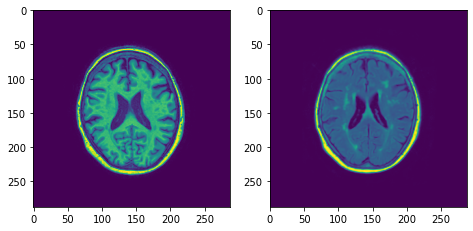

In [8]:
# step d- visual check ; plot I and It
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(131)
im11 = ax1.imshow(I)

ax2 = fig.add_subplot(132)
im21 = ax2.imshow(It)

<div id="evaluation"></div>

### 2.2 Evaluation of point-based affine image registration

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/question_ico.png" width="42" height="42"></div> 

### *Question 2*:
Describe how you would estimate the registration error. (Hint: Should you use the same points that you used for computing the affine transformation to also compute the registration error?) How does the number of corresponding point pairs affect the registration error? Motivate all your answers.

Antwoord: 
De registratiepunten gebruik je om de afbeelden met behulp van die punten precies op elkaar te leggen (dus de tranformatie te berekenen). Dan wil je natuurlijk met andere punten checken of ook op andere punten buiten die registratiepunten om de afbeelding ook netjes op elkaar ligt. Voor het berekenen van de error gebruik je dan ook andere punten. Daarnaast kies je daarvoor punten die relevant zijn voor de diagnose/behandeling, want daarin wil je de error zo klein mogelijk hebben voor goede resultaten.  

In [17]:
# Calculating of the Target registration error (TRE)
from registration import ls_affine
import registration_util as util

# step a - select 4 error registration points in the same fixed image (I) as above and the moved image (It). 
# These points need to be difference from the fiducial points which are selected at the task above.
# cpselect is modified now to an input with already "imread images". 
TRE_point, TRE_point_m = util.cpselectTRE(I, It) #NAVRAGEN It werkt niet want moet met path zijn
print(TRE_point, TRE_point_m)

[[135.75806452 205.16451613 142.57096774  84.23548387]
 [ 69.27980645 162.1056129  225.12496774 184.67335484]] [[140.17096774 208.72580645 142.72580645  84.81612903]
 [ 70.55722581 160.82819355 223.84754839 185.52496774]]


In [23]:
# step b- calculate the TRE: avarage distance between the points in de fixed image (TRE_points) and the moving image (TRE_points_m)
sum_differences_x = abs(TRE_point[0][0]-TRE_point_m[0][0]) + abs(TRE_point[0][1]-TRE_point_m[0][1]) + abs(TRE_point[0][2]-TRE_point_m[0][2]) + abs(TRE_point[0][3]-TRE_point_m[0][3])
sum_differences_y = abs(TRE_point[1][0]-TRE_point_m[1][0]) + abs(TRE_point[1][1]-TRE_point_m[1][1]) + abs(TRE_point[1][2]-TRE_point_m[1][2]) + abs(TRE_point[1][3]-TRE_point_m[1][3])
total_points=8
error = (sum_differences_x + sum_differences_y)**2 /total_points
print(error)

22.42339229968834


<div id="intensity-based_reg"></div>

## 3. Intensity-based registration

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div> 

<div id="comparison"></div>

### 3.1 Comparing the results of different registration methods

The following Python script (provided as `intensity_based_registration_demo()`) performs rigid intensity-based registration of two images using the normalized-cross correlation as a similarity metric:

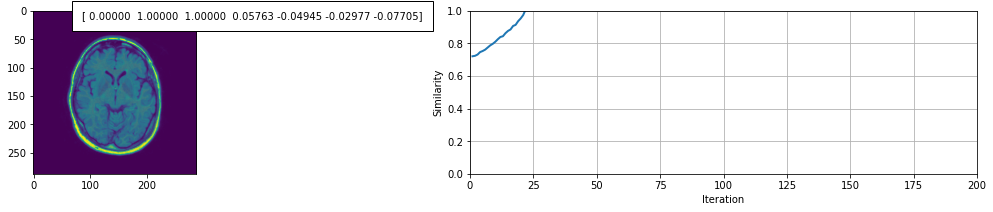

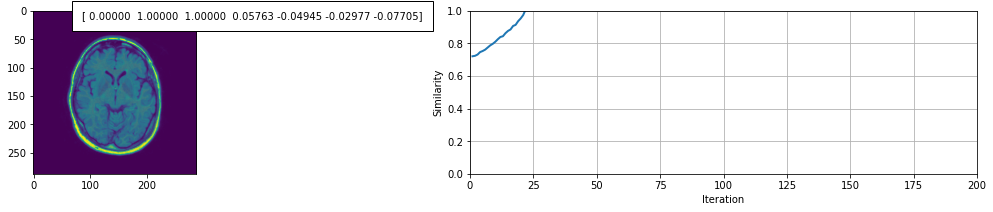

In [6]:
%matplotlib inline
import sys
sys.path.append("../code")
from registration_project import intensity_based_registration_demo
import matplotlib.pyplot as plt

I = plt.imread('../data/image_data/1_1_t1.tif') # select the name of the images to compare.  
Im = plt.imread('../data/image_data/1_1_t2.tif')
    
intensity_based_registration_demo(I, Im, "affine", "MI", 0.001) # select rigid/affine and CNN/MI.                                                                       

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div> 

### *Task 2*:

By changing the similarity function and the initial parameter vector, you can also use this script to perform affine registration and use mutual information as a similarity measure. Do not forget to also change the transformation for the visualization of the results.

Using the provided dataset and the functions that you have implemented in the exercises, perform the following series of experiments:

1. Rigid intensity-based registration of two T1 slices (e.g. `1_1_t1.tif` and `1_1_t1_d.tif`) using normalized cross-correlation as a similarity measure.
2. Affine intensity-based registration of two T1 slices (e.g. `1_1_t1.tif` and `1_1_t1_d.tif`) using normalized cross-correlation as a similarity measure.
3. Affine intensity-based registration of a T1 and a T2 slice (e.g. `1_1_t1.tif` and `1_1_t2.tif`) using normalized cross-correlation as a similarity measure.
4. Affine intensity-based registration of two T1 slices (e.g. `1_1_t1.tif` and `1_1_t1_d.tif`) using mutual information as a similarity measure.
5. Affine intensity-based registration of a T1 slice and a T2 slice (e.g. `1_1_t1.tif` and `1_1_t2.tif`) using mutual information as a similarity measure.

Describe, analyze and compare the results from each experiment. If a method fails, describe why you think it fails. Note that you will most likely have to try different values for the learning rate in each experiment in order to find the one that works best. 

In [7]:
%matplotlib inline
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("../code")
from registration import rigid_corr, affine_corr, affine_mi

I = plt.imread('../data/image_data/1_1_t1.tif')
Im = plt.imread('../data/image_data/1_1_t1_d.tif')

# adjust x to the result of the optimalization
# task 2.1
x=[1.55e-06, 2.24e-06, -2.19e-06]
task2_1=rigid_corr(I, Im, x)[0]


# task 2.2
x=[0, 1, 1, -9.31e-08, -8.34e-08, 3.19e-07, 5.03e-09]
task2_2=affine_corr(I, Im, x)[0]

# task 2.3
Im_2 = plt.imread('../data/image_data/1_1_t2.tif')
x=[0, 1, 1, 0.0024, -0.0025, 0.0019, -0.0019]
task2_3=affine_corr(I, Im_2, x)[0]

# task 2.4
x=[0, 1, 1, 2.32e-03, 8.89e-04, 1.16e-03, 1.22e-04]
task2_4=affine_mi(I, Im, x)[0]

# task 2.5
x=[0, 1, 1, 0.058, -0.050, -0.30, -0.078]
task2_5=affine_mi(I, Im_2, x)[0]


print(task2_1, task2_2, task2_3, task2_4, task2_5)


[[1.]] [[1.]] [[0.5393275]] 1.9178844121739527 0.8531066732701174


In [5]:
# met een ander plaatje proberen

I_b = plt.imread('../data/image_data/3_3_t1.tif')
Im_b = plt.imread('../data/image_data/3_3_t1_d.tif')

# adjust x to the result of the optimalization
# task 2.1_b
x=[-0.031, -0.088, -0.015]
task2_1_b=rigid_corr(I_b, Im_b, x)[0]

# task 2.2_b
x=[0, 1, 1, 0.0033, -0.081, -0.021, -0.094]
task2_2_b=affine_corr(I_b, Im_b, x)[0]

# task 2.3_b
Im_2_b = plt.imread('../data/image_data/3_3_t2.tif')
x=[0, 1, 1, 0.047, -0.044, -0.053, -0.079]
task2_3_b=affine_corr(I_b, Im_2_b, x)[0]

# task 2.4_b
x=[0, 1, 1, 0.0030, -0.080, -0.042, -0.10]
task2_4_b=affine_mi(I_b, Im_b, x)[0]

# task 2.5_b
x=[0, 1, 1, 0.051, -0.061, -0.069, -0.066]
task2_5_b=affine_mi(I_b, Im_2_b, x)[0]

print(task2_1_b, task2_2_b, task2_3_b, task2_4_b, task2_5_b)


[[0.63370265]] [[0.7379378]] [[0.6003981]] 0.8255683323145266 0.8152990106644369


In [3]:
# check of correlation and mutual information of two identical images. 
%matplotlib inline
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("../code")
from registration import rigid_corr, affine_corr, affine_mi

x=[0, 1, 1, 0, 0, 0, 0]

X_1= plt.imread('../data/image_data/1_1_t1.tif')
corr_test_1=affine_corr(X_1, X_1, x)[0]
mi_test_1=affine_mi(X_1, X_1, x)[0]

X_2= plt.imread('../data/image_data/3_3_t2.tif')
corr_test_2=affine_corr(X_2, X_2, x)[0]
mi_test_2=affine_mi(X_2, X_2, x)[0]

print(corr_test_1, mi_test_1, corr_test_2, mi_test_2)

[[1.]] 3.0221378494505986 [[1.]] 2.433490014189983
